In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.13


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

In [3]:
# Instala o pacote watermark.
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [4]:
# As novas versões dos pacotestrazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import re
import os

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 

if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark --iversions

numpy     : 1.21.5
pandas    : 1.4.2
sys       : 3.8.13 (default, Mar 28 2022, 11:38:47) 
[GCC 7.5.0]
matplotlib: 3.5.1
re        : 2.2.1
seaborn   : 0.11.2



In [6]:
arquivo_csv = 'dados/Loan_status_2007-2020Q3_100_soft.csv'
arq_df = pd.read_csv(arquivo_csv)

In [7]:
arq_df.shape

(100, 7)

In [8]:
arq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   borrower_id          100 non-null    object 
 1   addr_state           100 non-null    object 
 2   annual_inc           100 non-null    float64
 3   emp_length           100 non-null    object 
 4   home_ownership       100 non-null    object 
 5   verification_status  100 non-null    object 
 6   loan_status          100 non-null    object 
dtypes: float64(1), object(6)
memory usage: 5.6+ KB


In [19]:
#pd.options.display.max_rows
#pd.options.display.max_rows = 1000

60

In [20]:
#arq_df.head().T
arq_df.head(10)

,borrower_id,addr_state,annual_inc,emp_length,home_ownership,verification_status,loan_status
0,borrower-1,AZ,24000.0,10+ years,RENT,Verified,Fully Paid
1,borrower-2,GA,30000.0,< 1 year,RENT,Source Verified,Charged Off
2,borrower-3,IL,12252.0,10+ years,RENT,Not Verified,Fully Paid
3,borrower-4,CA,49200.0,10+ years,RENT,Source Verified,Fully Paid
4,borrower-5,OR,80000.0,1 year,RENT,Source Verified,Fully Paid
5,borrower-6,AZ,36000.0,3 years,RENT,Source Verified,Fully Paid
6,borrower-7,NC,47004.0,8 years,RENT,Not Verified,Fully Paid
7,borrower-8,CA,48000.0,9 years,RENT,Source Verified,Fully Paid
8,borrower-9,CA,40000.0,4 years,OWN,Source Verified,Charged Off
9,borrower-10,TX,15000.0,< 1 year,RENT,Verified,Charged Off


In [21]:
#arq_df.tail().T
arq_df.tail(10)

,borrower_id,addr_state,annual_inc,emp_length,home_ownership,verification_status,loan_status
90,borrower-91,TX,62000.0,< 1 year,RENT,Verified,Fully Paid
91,borrower-92,MN,43680.0,3 years,MORTGAGE,Not Verified,Fully Paid
92,borrower-93,NY,120000.0,3 years,RENT,Source Verified,Fully Paid
93,borrower-94,CA,66000.0,10+ years,RENT,Verified,Fully Paid
94,borrower-95,FL,39120.0,4 years,OWN,Not Verified,Fully Paid
95,borrower-96,VA,85000.0,6 years,RENT,Verified,Fully Paid
96,borrower-97,VA,47800.0,4 years,MORTGAGE,Verified,Fully Paid
97,borrower-98,WA,45000.0,7 years,MORTGAGE,Not Verified,Charged Off
98,borrower-99,IL,83000.0,10+ years,MORTGAGE,Verified,Fully Paid
99,borrower-100,CO,81000.0,< 1 year,RENT,Source Verified,Fully Paid


In [30]:
arq_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [36]:
arq_df.groupby(['loan_status','home_ownership'])['loan_status'].count()

loan_status  home_ownership
Charged Off  MORTGAGE           3
             OWN                1
             RENT              14
Fully Paid   MORTGAGE          20
             OWN                7
             RENT              55
Name: loan_status, dtype: int64

In [ ]:
arq_df.groupby(['loan_status'])['loan_status'].count()

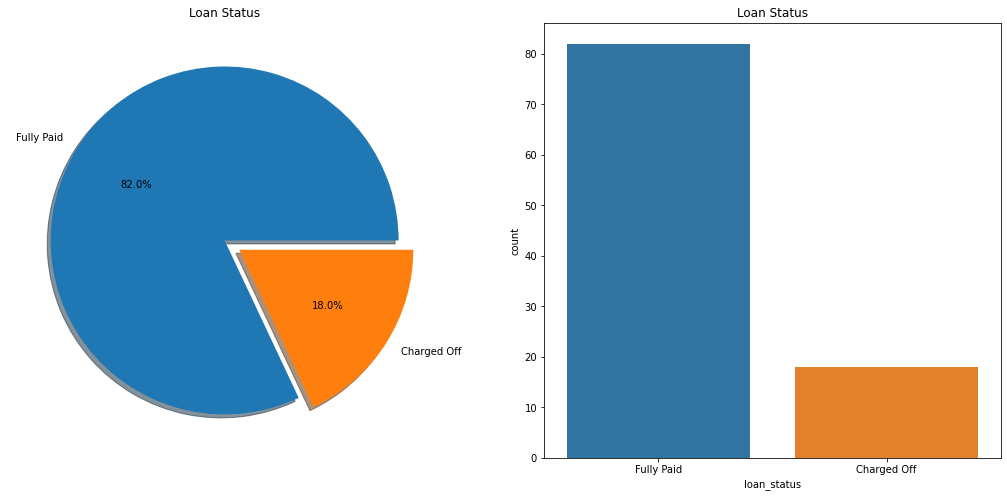

In [28]:
f,ax=plt.subplots(1,2,figsize=(18,8))
arq_df['loan_status'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Loan Status')
ax[0].set_ylabel('')
sns.countplot('loan_status',data=arq_df,ax=ax[1])
ax[1].set_title('Loan Status')
plt.show()

In [31]:
arq_df.describe().T

,count,mean,std,min,25%,50%,75%,max
annual_inc,100.0,57573.4419,26999.818922,12252.0,40000.0,50000.0,75000.0,150000.0


In [32]:
arq_df[arq_df['loan_status'] == 'Charged Off'].describe()

,count,mean,std,min,25%,50%,75%,max
annual_inc,18.0,58722.222222,26731.390606,15000.0,41250.0,50002.0,75750.0,105000.0


In [14]:
arq_df[arq_df['loan_status'] == 'Fully Paid'].describe().T

,count,mean,std,min,25%,50%,75%,max
annual_inc,82.0,57321.27061,27215.060254,12252.0,40000.0,50000.0,72000.0,150000.0


In [15]:
#plt.xkcd()

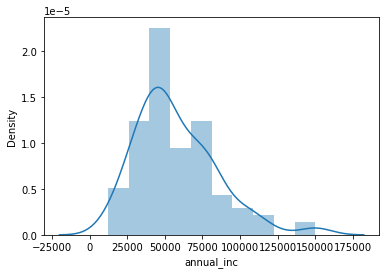

In [16]:
f = sns.distplot(arq_df['annual_inc'])